C:\Users\Влад\AppData\Local\Temp\ipykernel_19960\928747053.py:10: RuntimeWarning: divide by zero encountered in log2
  return np.array([-1 * (p * np.log2(p) + (1-p) * np.log2(1-p)) for p in probas])
C:\Users\Влад\AppData\Local\Temp\ipykernel_19960\928747053.py:10: RuntimeWarning: invalid value encountered in scalar multiply
  return np.array([-1 * (p * np.log2(p) + (1-p) * np.log2(1-p)) for p in probas])


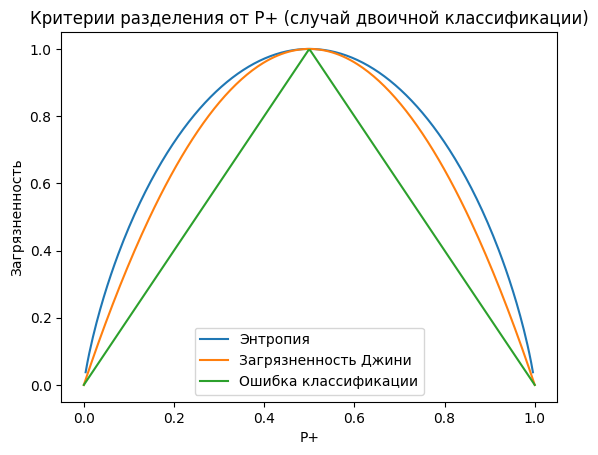

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def gini(probas):
    return np.array([1- (p ** 2 + (1-p) ** 2) for p in probas])


def entropy(probas):
    return np.array([-1 * (p * np.log2(p) + (1-p) * np.log2(1-p)) for p in probas])


def misclass_error_rate(probas):
    return np.array([1 - max([p, 1-p]) for p in probas])


probas = np.linspace(0, 1, 250)
plt.plot(probas, entropy(probas), label="Энтропия")
plt.plot(probas, 2 * gini(probas),  label="Загрязненность Джини")
plt.plot(probas, 2 * misclass_error_rate(probas), label="Ошибка классификации")
plt.title("Критерии разделения от P+ (случай двоичной классификации)")
plt.xlabel("P+")
plt.ylabel("Загрязненность")
plt.legend();

In [7]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# from matplotlib.colors import ListedColormap
# import matplotlib.pyplot as plt

# # To check recent matplotlib compatibility
# import matplotlib
# from distutils.version import LooseVersion
# def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

#     # setup marker generator and color map
#     markers = ('s', 'x', 'o', '^', 'v')
#     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#     cmap = ListedColormap(colors[:len(np.unique(y))])

#     # plot the decision surface
#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#                            np.arange(x2_min, x2_max, resolution))
#     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
#     Z = Z.reshape(xx1.shape)
#     plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())

#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0], 
#                     y=X[y == cl, 1],
#                     alpha=0.8, 
#                     color=colors[idx],
#                     marker=markers[idx], 
#                     label=cl, 
#                     edgecolor='black')

#     # highlight test examples
#     if test_idx:
#         # plot all examples
#         X_test, y_test = X[test_idx, :], y[test_idx]

        
#         if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
#             plt.scatter(X_test[:, 0],
#                         X_test[:, 1],
#                         c='',
#                         edgecolor='black',
#                         alpha=1.0,
#                         linewidth=1,
#                         marker='o',
#                         s=100, 
#                         label='test set')
#         else:
#             plt.scatter(X_test[:, 0],
#                         X_test[:, 1],
#                         c='none',
#                         edgecolor='black',
#                         alpha=1.0,
#                         linewidth=1,
#                         marker='o',
#                         s=100, 
#                         label='test set') 

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

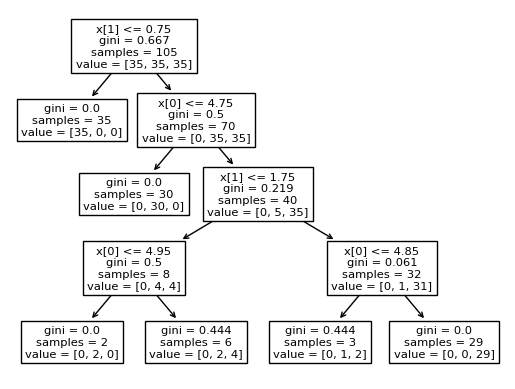

In [11]:
from sklearn import tree

tree.plot_tree(tree_model)
#plt.savefig('images/03_21_1.pdf')
plt.show()